## Synthetic Dataset

In [2]:
import pandas as pd
import numpy as np


np.random.seed(123)

variables = ['X', 'Y', 'Z']
labels = ['ID_0', 'ID_1', 'ID_2', 'ID_3', 'ID_4']

X = np.random.random_sample([5, 3])*10
df = pd.DataFrame(X, columns=variables, index=labels)
df

,X,Y,Z
ID_0,6.964692,2.861393,2.268515
ID_1,5.513148,7.194690,4.231065
ID_2,9.807642,6.848297,4.809319
ID_3,3.921175,3.431780,7.290497
ID_4,4.385722,0.596779,3.980443


## Performing hierarchical clustering on a distance matrix

In [4]:
from scipy.spatial.distance import pdist, squareform


row_dist = pd.DataFrame(squareform(pdist(df, metric='euclidean')),
                        columns=labels,
                        index=labels)
row_dist

,ID_0,ID_1,ID_2,ID_3,ID_4
ID_0,0.000000,4.973534,5.516653,5.899885,3.835396
ID_1,4.973534,0.000000,4.347073,5.104311,6.698233
ID_2,5.516653,4.347073,0.000000,7.244262,8.316594
ID_3,5.899885,5.104311,7.244262,0.000000,4.382864
ID_4,3.835396,6.698233,8.316594,4.382864,0.000000


In the following example, we are going to use the **linkage** function from scipy.
Check [this link](https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.linkage.html) to understand the arguments needed by this function:

In [18]:
from scipy.cluster.hierarchy import linkage

## input matrix
row_clusters = linkage(df.values, method='complete', metric='euclidean') ## return a numpy array
pd.DataFrame(row_clusters,
             columns=['row label 1', 'row label 2',
                      'distance', 'no. of items in clust.'],
             index=[f'cluster {(i + 1)}'
                    for i in range(row_clusters.shape[0])])

,row label 1,row label 2,distance,no. of items in clust.
cluster 1,0.0,4.0,3.835396,2.0
cluster 2,1.0,2.0,4.347073,2.0
cluster 3,3.0,5.0,5.899885,3.0
cluster 4,6.0,7.0,8.316594,5.0


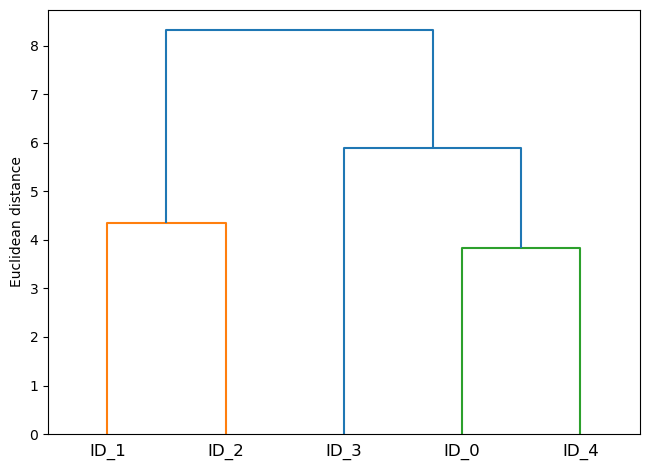

In [7]:
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram


# make dendrogram black (part 1/2)
# from scipy.cluster.hierarchy import set_link_color_palette
# set_link_color_palette(['black'])

row_dendr = dendrogram(row_clusters, 
                       labels=labels,
                       # make dendrogram black (part 2/2)
                       # color_threshold=np.inf
                       )
plt.tight_layout()
plt.ylabel('Euclidean distance')
#plt.savefig('figures/10_11.png', dpi=300, 
#            bbox_inches='tight')
plt.show()

## Applying agglomerative clustering via scikit-learn

In [9]:
from packaging import version
import sklearn
from sklearn.cluster import AgglomerativeClustering


if version.parse(sklearn.__version__) > version.parse("1.2"):
    ac = AgglomerativeClustering(n_clusters=3,
                                 metric="euclidean",
                                 linkage="complete"
                                )
else:
    ac = AgglomerativeClustering(n_clusters=3,
                                 affinity="euclidean",
                                 linkage="complete"
                                )

labels = ac.fit_predict(X)
print(df)
print(f'Cluster labels: {labels}')

             X         Y         Z
ID_0  6.964692  2.861393  2.268515
ID_1  5.513148  7.194690  4.231065
ID_2  9.807642  6.848297  4.809319
ID_3  3.921175  3.431780  7.290497
ID_4  4.385722  0.596779  3.980443
Cluster labels: [1 0 0 2 1]
